In [1]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx
import pandas as pd
import copy

In [2]:
#TD: If at some point you get a "omp Error #15," try running this code. It worked for me, but apparently it is not the best solution as it can cause problems, so use with "caution" I suppose 

import os 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
covid = BayesNet()
covid.load_from_bifxml('testing/Use_Case.BIFXML')

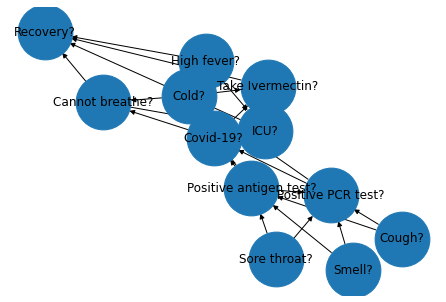

In [4]:
covid.draw_structure()

In [5]:
covid.get_all_variables()

['Cough?',
 'Smell?',
 'Sore throat?',
 'Positive PCR test?',
 'Positive antigen test?',
 'Covid-19?',
 'Cold?',
 'Cannot breathe?',
 'High fever?',
 'Take Ivermectin?',
 'ICU?',
 'Recovery?']

In [6]:
covid.get_all_cpts()

{'Cough?':    Cough?     p
 0   False  0.95
 1    True  0.05, 'Smell?':    Smell?     p
 0   False  0.02
 1    True  0.98, 'Sore throat?':    Sore throat?     p
 0         False  0.95
 1          True  0.05, 'Positive PCR test?':     Positive antigen test?  Sore throat?  Smell?  Cough?  Positive PCR test?  \
 0                    False         False   False   False               False   
 1                    False         False   False   False                True   
 2                    False         False   False    True               False   
 3                    False         False   False    True                True   
 4                    False         False    True   False               False   
 5                    False         False    True   False                True   
 6                    False         False    True    True               False   
 7                    False         False    True    True                True   
 8                    False          True 

In [7]:
covid.get_children('ICU?')

['Recovery?']

In [8]:
covid.get_all_edges()

[('Cough?', 'Positive PCR test?'),
 ('Cough?', 'Positive antigen test?'),
 ('Smell?', 'Positive PCR test?'),
 ('Smell?', 'Positive antigen test?'),
 ('Sore throat?', 'Positive PCR test?'),
 ('Sore throat?', 'Positive antigen test?'),
 ('Positive PCR test?', 'Cold?'),
 ('Positive PCR test?', 'Covid-19?'),
 ('Positive antigen test?', 'Positive PCR test?'),
 ('Positive antigen test?', 'Cold?'),
 ('Positive antigen test?', 'Covid-19?'),
 ('Covid-19?', 'Take Ivermectin?'),
 ('Covid-19?', 'High fever?'),
 ('Covid-19?', 'Cannot breathe?'),
 ('Cold?', 'Take Ivermectin?'),
 ('Cold?', 'High fever?'),
 ('Cold?', 'Cannot breathe?'),
 ('Cannot breathe?', 'ICU?'),
 ('Cannot breathe?', 'Recovery?'),
 ('High fever?', 'ICU?'),
 ('High fever?', 'Recovery?'),
 ('Take Ivermectin?', 'ICU?'),
 ('Take Ivermectin?', 'Recovery?'),
 ('ICU?', 'Recovery?')]

## a) d-separation 

In [9]:
reasoner = BNReasoner(covid)

In [10]:
x = ['Sore throat?', 'Cold?']
y = ['Cough?', 'ICU?']
z = ['Take Ivermectin?']
reasoner.d_separation(x, y, z)

False

## b) Ordering

In [11]:
print('Mindegree heuristic: ')
reasoner.ordering_mindegree()

Mindegree heuristic: 


['Cough?',
 'Smell?',
 'Sore throat?',
 'Positive PCR test?',
 'Positive antigen test?',
 'Covid-19?',
 'Cold?',
 'Cannot breathe?',
 'High fever?',
 'Take Ivermectin?',
 'ICU?',
 'Recovery?']

In [12]:
print('Minfill heuristic: ')

reasoner.ordering_minfill()

Minfill heuristic: 


['Cough?',
 'Smell?',
 'Sore throat?',
 'Positive PCR test?',
 'Positive antigen test?',
 'Covid-19?',
 'Cold?',
 'Cannot breathe?',
 'High fever?',
 'Take Ivermectin?',
 'ICU?',
 'Recovery?']

# c) Network Pruning

In [13]:
q = ['ICU?']
e = pd.Series({'Covid-19?': True, 'Cold?': False})

pruned = reasoner.net_prune(q, e)

In [14]:
pruned.get_cpt('ICU?')

,Take Ivermectin?,High fever?,Cannot breathe?,ICU?,p
0,False,False,False,False,1.00
1,False,False,False,True,0.00
2,False,False,True,False,0.70
3,False,False,True,True,0.30
4,False,True,False,False,0.60
5,False,True,False,True,0.40
6,False,True,True,False,0.50
7,False,True,True,True,0.50
8,True,False,False,False,0.40
9,True,False,False,True,0.60


## d) Marginal distributions

### summing-out: 

In [15]:
factor = covid.get_cpt('ICU?')
factor

,Take Ivermectin?,High fever?,Cannot breathe?,ICU?,p
0,False,False,False,False,1.00
1,False,False,False,True,0.00
2,False,False,True,False,0.70
3,False,False,True,True,0.30
4,False,True,False,False,0.60
5,False,True,False,True,0.40
6,False,True,True,False,0.50
7,False,True,True,True,0.50
8,True,False,False,False,0.40
9,True,False,False,True,0.60


In [16]:
reasoner.sum_out(factor, ['ICU?'])

,Take Ivermectin?,High fever?,Cannot breathe?,p
0,False,False,False,1.0
1,False,False,True,1.0
2,False,True,False,1.0
3,False,True,True,1.0
4,True,False,False,1.0
5,True,False,True,1.0
6,True,True,False,1.0
7,True,True,True,1.0


### multiplying

In [17]:
hospital = covid.get_cpt('ICU?')
hospital

,Take Ivermectin?,High fever?,Cannot breathe?,ICU?,p
0,False,False,False,False,1.00
1,False,False,False,True,0.00
2,False,False,True,False,0.70
3,False,False,True,True,0.30
4,False,True,False,False,0.60
5,False,True,False,True,0.40
6,False,True,True,False,0.50
7,False,True,True,True,0.50
8,True,False,False,False,0.40
9,True,False,False,True,0.60


In [18]:
Joe_Rogan = covid.get_cpt('Take Ivermectin?')
Joe_Rogan

,Cold?,Covid-19?,Take Ivermectin?,p
0,False,False,False,1.000
1,False,False,True,0.000
2,False,True,False,0.995
3,False,True,True,0.005
4,True,False,False,0.950
5,True,False,True,0.050
6,True,True,False,0.950
7,True,True,True,0.050


In [19]:
hospital = covid.get_cpt('ICU?')
Joe_Rogan = covid.get_cpt('Take Ivermectin?')

reasoner.multiply(hospital, Joe_Rogan)

,Take Ivermectin?,High fever?,Cannot breathe?,ICU?,Cold?,Covid-19?,p
0,True,True,True,True,True,True,0.04250
1,True,True,True,True,True,False,0.04250
2,True,True,True,True,False,True,0.00425
3,True,True,True,True,False,False,0.00000
4,True,True,True,False,True,True,0.00750
...,...,...,...,...,...,...,...
59,False,False,False,True,False,False,0.00000
60,False,False,False,False,True,True,0.95000
61,False,False,False,False,True,False,0.95000
62,False,False,False,False,False,True,0.99500


In [20]:
reasoner.mult([Joe_Rogan, hospital])

,Cold?,Covid-19?,Take Ivermectin?,High fever?,Cannot breathe?,ICU?,p
0,False,False,False,False,False,False,1.0000
1,False,False,False,False,False,True,0.0000
2,False,False,False,False,True,False,0.7000
3,False,False,False,False,True,True,0.3000
4,False,False,False,True,False,False,0.6000
...,...,...,...,...,...,...,...
59,True,True,True,False,True,True,0.0350
60,True,True,True,True,False,False,0.0100
61,True,True,True,True,False,True,0.0400
62,True,True,True,True,True,False,0.0075


### get marginal

In [21]:
evidence = pd.Series({"Cold?": False, "Sore throat?": False})
query_vars = ["Recovery?", "ICU?"]

marginals = reasoner.get_marginal(query_vars, evidence)

ValueError: Length of values (2) does not match length of index (4)

In [ ]:
marginals

In [ ]:
reasoner.mult([Joe_Rogan, hospital])

## MPE

In [22]:
reasoner.MPE('mindegree')

['Cough?', 'Smell?', 'Sore throat?', 'Positive PCR test?', 'Positive antigen test?', 'Covid-19?', 'Cold?', 'Cannot breathe?', 'High fever?', 'Take Ivermectin?', 'ICU?', 'Recovery?']
[   Cough?     p
0   False  0.95
1    True  0.05,     Positive antigen test?  Sore throat?  Smell?  Cough?  Positive PCR test?  \
0                    False         False   False   False               False   
1                    False         False   False   False                True   
2                    False         False   False    True               False   
3                    False         False   False    True                True   
4                    False         False    True   False               False   
5                    False         False    True   False                True   
6                    False         False    True    True               False   
7                    False         False    True    True                True   
8                    False          True   False

192
     Cold? Covid-19?  Cannot breathe?  High fever?  Take Ivermectin? Cough?  \
0    False     False            False        False             False  False   
1    False     False            False        False             False  False   
2    False     False            False        False             False  False   
3    False     False            False        False             False  False   
4    False     False            False        False             False   True   
..     ...       ...              ...          ...               ...    ...   
187   True      True             True         True              True  False   
188   True      True             True         True              True  False   
189   True      True             True         True              True  False   
190   True      True             True         True              True   True   
191   True      True             True         True              True   True   

    Smell? Sore throat? Positive PCR test? Posi

                                                                                                                                             p  \
ICU?  Recovery? Cough? Smell? Sore throat? Positive PCR test? Positive antigen test? Covid-19? Cold? Cannot breathe? High fever?                 
False False     False  False  True         True               True                   True      False False           False        3.740571e-09   
                                                                                                                     True         1.116560e-06   
                                                                                               True  False           True         3.411450e-10   
                                                                                                     True            False        1.053285e-08   
                       True   False        False              False                  False     True  False           False  

(          p Cough? Smell? Sore throat? Positive PCR test?  \
 8  0.280128  False   True        False              False   
 
   Positive antigen test? Covid-19? Cold? Cannot breathe? High fever?  \
 8                  False     False  True           False       False   
 
   Take Ivermectin?   ICU? Recovery?  
 8            False  False      True  , 1086, 0, 1086)

In [ ]:
reasoner.MAP('mindegree', map_var = [])